#### Loading the IMDB dataset

In [1]:
from keras.datasets import imdb

import numpy as np

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data,  test_labels) = imdb.load_data(num_words=10000)

np.load = np_load_old

Using TensorFlow backend.


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#### Preparing the data
Encoding the Integer sequences into a binary matrix

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Setting aside a validation set

In [5]:
x_val = x_train[: 10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Building the model
Original model

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

W0924 11:12:55.262918 4549924288 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0924 11:12:55.307776 4549924288 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 11:12:55.314235 4549924288 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#### Training the model

In [7]:
from keras import optimizers

model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

W0924 11:12:55.369317 4549924288 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0924 11:12:55.388282 4549924288 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0924 11:12:55.394793 4549924288 deprecation.py:323] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0924 11:12:55.787724 4549924288 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backen

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.3004 - acc: 0.9046 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.2179 - acc: 0.9287 - val_loss: 0.3087 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3164 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - val_a

In [8]:
original_loss = history.history['val_loss']
original_loss_training = history.history['loss']

#### Version of the model with lower capacity

In [9]:
low = Sequential()
low.add(Dense(4, activation='relu', input_shape=(10000,)))
low.add(Dense(4, activation='relu'))
low.add(Dense(1, activation='sigmoid'))
low.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
low.compile(optimizer = 'rmsprop',
            loss = 'binary_crossentropy',
            metrics = ['acc'])

historylow = low.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.6050 - acc: 0.7685 - val_loss: 0.5338 - val_acc: 0.8324
Epoch 2/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.4635 - acc: 0.8736 - val_loss: 0.4312 - val_acc: 0.8628
Epoch 3/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.3712 - acc: 0.8937 - val_loss: 0.3685 - val_acc: 0.8749
Epoch 4/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.3052 - acc: 0.9095 - val_loss: 0.3337 - val_acc: 0.8755
Epoch 5/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.2585 - acc: 0.9205 - val_loss: 0.3015 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.2233 - acc: 0.9293 - val_loss: 0.2844 - val_acc: 0.8913
Epoch 7/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1961 - acc: 0.9375 - val_loss: 0.2792 - val_ac

In [11]:
low_loss = historylow.history['val_loss']

#### Plotting the validation loss

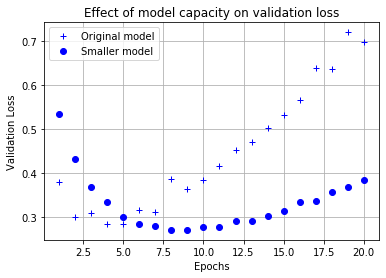

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(original_loss) + 1)
plt.plot(epochs, original_loss, 'b+', label='Original model')
plt.plot(epochs, low_loss, 'bo', label='Smaller model')
plt.title('Effect of model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

#### Version of the model with higher capacity

In [13]:
high = Sequential()
high.add(Dense(512, activation='relu', input_shape=(10000,)))
high.add(Dense(512, activation='relu'))
high.add(Dense(1, activation='sigmoid'))
high.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [14]:
high.compile(optimizer = 'rmsprop',
            loss = 'binary_crossentropy',
            metrics = ['acc'])

historyhigh = high.fit(partial_x_train,
                        partial_y_train,
                        epochs = 20,
                        batch_size = 512,
                        validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 534us/step - loss: 0.5433 - acc: 0.7730 - val_loss: 0.3106 - val_acc: 0.8756
Epoch 2/20
15000/15000 [==============================] - 7s 479us/step - loss: 0.2679 - acc: 0.8939 - val_loss: 0.2717 - val_acc: 0.8906
Epoch 3/20
15000/15000 [==============================] - 9s 579us/step - loss: 0.1482 - acc: 0.9447 - val_loss: 0.2803 - val_acc: 0.8912
Epoch 4/20
15000/15000 [==============================] - 9s 583us/step - loss: 0.0773 - acc: 0.9732 - val_loss: 0.5013 - val_acc: 0.8613
Epoch 5/20
15000/15000 [==============================] - 7s 477us/step - loss: 0.0776 - acc: 0.9803 - val_loss: 0.3639 - val_acc: 0.8913
Epoch 6/20
15000/15000 [==============================] - 8s 545us/step - loss: 0.0032 - acc: 0.9995 - val_loss: 0.5318 - val_acc: 0.8810
Epoch 7/20
15000/15000 [==============================] - 8s 550us/step - loss: 5.0807e-04 - acc: 1.0000 - val_loss: 0.572

In [15]:
high_loss = historyhigh.history['val_loss']
high_loss_training = historyhigh.history['loss']

#### Plotting the validation loss

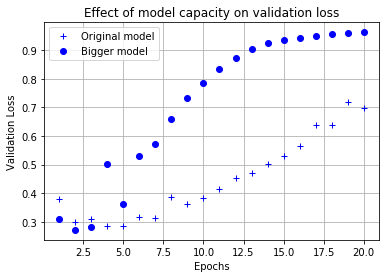

In [16]:
plt.plot(epochs, original_loss, 'b+', label='Original model')
plt.plot(epochs, high_loss, 'bo', label='Bigger model')
plt.title('Effect of model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

#### Plotting the training loss

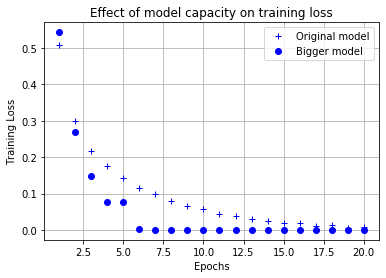

In [17]:
plt.plot(epochs, original_loss_training, 'b+', label='Original model')
plt.plot(epochs, high_loss_training, 'bo', label='Bigger model')
plt.title('Effect of model capacity on training loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.show()

#### Adding L2 weight regularization to the model

In [19]:
from keras import regularizers

modell2 = Sequential()
modell2.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
modell2.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
modell2.add(Dense(1, activation='sigmoid'))
modell2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
modell2.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

historyl2 = modell2.fit(partial_x_train,
                        partial_y_train,
                        epochs = 20,
                        batch_size = 512,
                        validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.5701 - acc: 0.7883 - val_loss: 0.4847 - val_acc: 0.8245
Epoch 2/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.3763 - acc: 0.8952 - val_loss: 0.3677 - val_acc: 0.8766
Epoch 3/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2950 - acc: 0.9189 - val_loss: 0.3343 - val_acc: 0.8891
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2554 - acc: 0.9303 - val_loss: 0.3360 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2339 - acc: 0.9398 - val_loss: 0.3424 - val_acc: 0.8831
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2178 - acc: 0.9471 - val_loss: 0.3335 - val_acc: 0.8844
Epoch 7/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.2035 - acc: 0.9518 - val_loss: 0.3399 - val_ac

In [21]:
l2_loss = historyl2.history['val_loss']

#### Plotting the validation loss

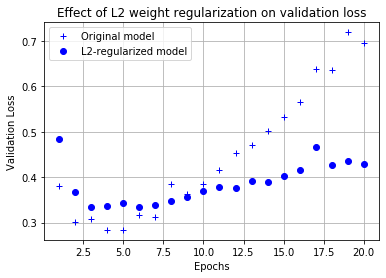

In [22]:
plt.plot(epochs, original_loss, 'b+', label='Original model')
plt.plot(epochs, l2_loss, 'bo', label='L2-regularized model')
plt.title('Effect of L2 weight regularization on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### Adding dropout to the IMDB network

In [23]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

W0924 11:19:43.869473 4549924288 deprecation.py:506] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

history_dropout = model.fit(partial_x_train,
                            partial_y_train,
                            epochs = 20,
                            batch_size = 512,
                            validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.6383 - acc: 0.6244 - val_loss: 0.5502 - val_acc: 0.8383
Epoch 2/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.5389 - acc: 0.7429 - val_loss: 0.4569 - val_acc: 0.8406
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.4597 - acc: 0.8098 - val_loss: 0.3973 - val_acc: 0.8559
Epoch 4/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.3995 - acc: 0.8435 - val_loss: 0.3340 - val_acc: 0.8828
Epoch 5/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.3480 - acc: 0.8722 - val_loss: 0.3127 - val_acc: 0.8841
Epoch 6/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.3075 - acc: 0.8985 - val_loss: 0.3029 - val_acc: 0.8866
Epoch 7/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2707 - acc: 0.9129 - val_loss: 0.2969 - val_ac

In [25]:
dropout_loss = history_dropout.history['val_loss']

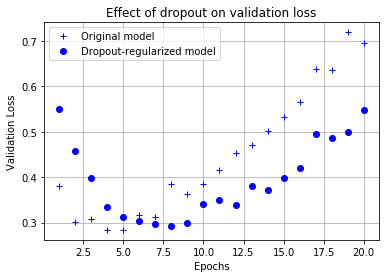

In [26]:
plt.plot(epochs, original_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_loss, 'bo', label='Dropout-regularized model')
plt.title('Effect of dropout on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()